<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/MLPNS23_Lesson_17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Il metodo scientifico in un contesto probabilistico

Il null hypothesis rejection testing framework è un punto di partenza fondamentale per l'analisi di machine learning. Si parte dalla solita gaussiana e dal principio di falsicabilità. 

Dato un modello e dunque una predizione, dobbiamo verificare se i dati falsificano oppure no il modello. Il framework della null hypothesis ci dice se supponiamo che nel nostro modello questa cosa NON avviene, c'è una BASSA probabilità che questa cosa avvenga (lavoriamo in un probabilistic induction framework). Diamo una threshold per decidere se la probabilità è sufficiente per accettare la null hypothesis. Tipicamente in fisica si prende **$3\sigma$** o più. 

Per vedere se una teoria è migliore rispetto a quella che ho costruito, come posso verificarlo a livello di probabilistic induction? 

Quali sono i passi da fare?

1) Formulo una predizione, e definisco una null hypothesis;

2) Identifico tutte le ipotesi alternative qualora la null hypothesis sia rigettata, ed è importante che le teorie rispettino la conservazione della probabilità, cioé

**$P(A)+P(\bar{A})=1$**

Dove **$A$** è l'evento della mia null hypothesis e **$\bar{A}$** è l'alternativa. Ad esempio, posso prendere come null hypothesis **$A=$**{la terra è piatta}, e quindi la alternative hypothesis è **$\bar{A}=$**{la terra non è piatta};

3) Settiamo il threshold di confidenza, cioè quale limite do al **$n\sigma$**, assumendo che i dati siano gaussiani;

4) Troviamo delle pivotal quantities, ossia delle quantità misurabili nel mio modello che sotto la null hypothesis seguono una data distribuzione. In poche parole, scelgo il tipo di test statistico da utilizzare. Questa diventa:

**$p(pivotal quantity|D)\sim p(NH|D)$**

Dove **$\alpha$** è la mia threshold. Ad esempio, la **$\chi^2$** test, che misura la pivotal quantity:

**$\chi^2=\sum_i \frac{(f(x_i)-y_i)^2}{\sigma_i^2}$**

Il chi-2 test misura punto per punto la bontà delle mie misure. Cioè misuro la differenza tra i valori di aspettazione e i valori reali al quadrato, diviso l'errore relativo al quadrato **$\sigma_i^2$** delle mie misure;

5) Calcoliamo la pivotal quantity;

6) Inseriamola nella sua distribuzione di probabilità, e valutiamo se soddisfa o meno il nostro threshold;




# Test Comuni e Pivotal Quantities:

Ci sono un'enormità di test statistici, adatti al mio tipo di ipotesi e ai miei dati. Se dobbiamo ad esempio fare un fit, il test del **$\chi^2$** è ottimo. Per il calcolo di una correlazione tra dati è ottimale una linear regression. Vediamone alcuni utili:

CHI2-TEST:
Già visto.

Z-TEST:

E' vero che la  media di un sample con una varianza nota è la stessa di quella di una popolazione nota? La pivotal quantity è:

**$Z=\frac{(\bar{X}-\mu_0)}{s}$**

Dove **$\bar{X}$** è la media del sample, **$\mu_0$** è la media della popolazione e **$s=\sigma/n$** è la varianza del sample diviso il numero dei suoi elementi. Questo test confronta solo le medie. La pivotal quantity Z ha una distribuzione facile, ossia è una gaussiana centrata in zero con varianza unitaria:

**$Z \sim \mathcal{N}(\mu=0,\sigma=1)$**

T-TEST:

E' vero che le medie di due diversi sample sono significativamente differenti? La pivotal quantity è:

**$t=\frac{\bar{X_1}-\bar{X_2}}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$**

La t segue la distribuzione di Student.

KOLMOGOROV-SMIRNOFF (K-S) TEST:

E' un modello non parametrico, con un range di applicabilità molto più ampio. E' vero che due sample provengono dalla medesima distribuzione cumulativa? La pivotal quantity è:

**$d_{12}=max_x |C_1(x)-C_2(x)|$**

Misura la massima differenza tra i dati delle due samples. Dove **$C_1(x)$** e **$C_2(x)$** sono le due distribuzioni cumulative. La probabilità **$P(d>observed)$** è matematicamente una probabilità con variabile d definita positiva, e si può dimostrare che è distribuita come un chi_square distribution. Mi interessa sapere questa cosa se voglio calcolare il p-value.




# Il problema della demarcazione nei contesti Bayesiani

Nella null hypothesis rejection test si utilizza un'ipotesi frequentista della probabilità. Che vuol dire non interpretare la probabilità in maniera frequentista? Vuol dire che parliamo di un'interpretazione bayesiana della probabilità. Dalla definizione di probabilità condizionata:

**$p(M|D)=\frac{P(M)P(D|M)}{P(D)}$**   

M -> modello, D - > dati. P(M) è il prior, mentre, P(D|M) è la likelihood, P(D) è l'evidence, P(M|D) è la posterior. Dal teorema di disintegrazione:

**$P(A|B)P(B)=P(B|A)P(A)$**

Quindi si ha il teorema di Bayes:

**$p(A|B)=\frac{P(A)P(B|A)}{P(B)}$**

Posso verificare attraverso la probabilità bayesiana se un certo set di parametri **$\theta_1$** è meglio di altro set **$\theta_2$** attraverso il teorema:

**$P(\theta_1|D)>P(\theta_2|D)$**?

Allora:

**$\frac{P(\theta_1)P(D|\theta_1)}{P(D)}>\frac{P(\theta_2)P(D|\theta_2)}{P(D)}$**

Posso scegliere due prior **$P(\theta_1)$** e **$P(\theta_2)$** liberamente, la likelihood si legge dal modello, e l'evidenza P(D) non è importante poichè si cancella nella disuguaglianza.

# Leggi di Scala:

Due quantità che sono relazionate alla stessa variabile fisica, ma con una legge a potenza diversa. Ad esempio: lunghezza ed area, area e volume, etc...

L'esistenza di una relazione di scala tra due quantità fisiche posso relazionarla ad un modello che prevede questa scaling law. Ad esempio in astrofisica la Tully - Fisher relationship è una relazione empirica tra la luminosità di una galassia e la sua velocità di rotazione, legata ad una prediction dei modelli di gravità. Altra scaling law è sul metabolismo basali dei mammari in funzione del loro peso in biologia, e questa scaling law è dovuta ad un modello teorico di network per i vasi sanguigni. La scaling law esiste anche per l'urban science, ad esempio la quantità di crimine, il GDP, il medium income e il numero di patenti sono funzioni lineari in log space della quantità di popolazione, e ciò è legato a modelli di predizione teorici di networks. 

# Applicazione delle Scaling Law: Earthquakes

L'idea dell'autore è che vi sia una scaling law tra l'intervallo temporale tra un terremoto e l'altro e la loro magnitudine. Si utilizza un test KS separando i sample dei diversi earthquakes a diversa magnitudine, e confronto i vari gruppi.

Null Hypothesis: Esiste una scaling law che scala come la magnitudine dei terremoti. Prendendo dei subsets dei vari terremoti costruendo dei samplus di diverse magnitudini, i miei samples hanno la stessa distribuzione (i.e. coincide con la predizione di avere la stessa scaling law);



In [62]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy as sp
from scipy import stats

In [3]:
eqs=pd.read_csv("https://github.com/fedhere/MLPNS_FBianco/blob/main/statistics/KStest/earthquakes.csv?raw=true", sep=" ")

In [4]:
eqs.shape
#70798 terremoti
#34 colonne

(70798, 34)

In [5]:
eqs.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,...,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,...,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,...,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
eqs.head()
#mi interessano le date YYY/MM/DD e le magnitudini MAG

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
eqs.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'LON', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'NPH', 'NGRM'],
      dtype='object')

In [8]:
# affinché funzioni sul mio dataframe devo fare agire inplace=True;
eqs.rename({"#YYY/MM/DD":"date", "HH:mm:SS.ss": "time"}, axis=1, inplace=True)

In [18]:
eqs.head()

,date,time,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-01-01 19:38:19.790


In [19]:
eqs.time.dtype, eqs.date.dtype
# O vuol dire object, in questo caso stringa

(dtype('O'), dtype('O'))

In [11]:
# voglio trasformarlo in un datetime (pacchetto di pandas) con la funzione pd.to_datetime
# arriva fino ai nanosecondi

# qui c'è un esempio di prova
pd.to_datetime("1984/01/01" + " " + "19:38:19.79")

Timestamp('1984-01-01 19:38:19.790000')

In [12]:
eqs.date.map(pd.to_datetime)
#la funzione map fa applicare la funzione "pd.to_datetime" alla colonna date
#un'alternativa più comoda visto che ci sono un po' di errori è usare un for loop

0       1984-01-01
1       1984-01-01
2       1984-01-01
3       1984-01-01
4       1984-01-01
           ...    
70793   2002-12-29
70794   2002-12-29
70795   2002-12-29
70796   2002-12-30
70797   2002-12-30
Name: date, Length: 70798, dtype: datetime64[ns]

In [15]:
#ParserError: second must be in 0..59: 1984/08/09 04:48:60.00
#errore di formattazione dei dati, pandas legge da 0 a 59 secondi! 
#non ammette i 60

#questa nostra correzione coi for loop elimina il problema dei 60 secondi!

for i in range(len(eqs)):
  if eqs.iloc[i]["time"].endswith("60.00"):
    print(eqs.iloc[i]["time"])
    print(eqs.iloc[i]["time"].replace("60.00", "59.99"))
    #iloc è supportato fino a una cella di una certa dimensione
    #attualmente si usa at, un metodo computazionalmente più efficiente
    eqs.at[i, "time"] = eqs.iloc[i]["time"].replace("60.00", "59.99")
    print(eqs.iloc[i]["time"])

04:48:60.00
04:48:59.99
04:48:59.99
14:19:60.00
14:19:59.99
14:19:59.99
21:48:60.00
21:48:59.99
21:48:59.99
15:34:60.00
15:34:59.99
15:34:59.99
06:41:60.00
06:41:59.99
06:41:59.99


In [23]:
for i in range(10):
  print(eqs.iloc[i].date + " " + eqs.iloc[i].time)

1984/01/01 01:30:57.52
1984/01/01 05:31:34.16
1984/01/01 06:59:05.14
1984/01/01 11:10:25.29
1984/01/01 19:38:19.79
1984/01/01 19:39:19.67
1984/01/01 20:19:47.21
1984/01/02 03:51:52.76
1984/01/02 05:00:12.44
1984/01/02 05:02:17.29


In [17]:
#creo una sola colonna, detta "datetime"

#questa struttura è una list comprehension con un for loop
eqs['datetime'] = [eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(len(eqs))]
eqs["datetime"] = eqs["datetime"].map(pd.to_datetime)


In [25]:
# è la mia nuova colonna con il datetime
[eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(len(eqs))]

['1984/01/01 01:30:57.52',
 '1984/01/01 05:31:34.16',
 '1984/01/01 06:59:05.14',
 '1984/01/01 11:10:25.29',
 '1984/01/01 19:38:19.79',
 '1984/01/01 19:39:19.67',
 '1984/01/01 20:19:47.21',
 '1984/01/02 03:51:52.76',
 '1984/01/02 05:00:12.44',
 '1984/01/02 05:02:17.29',
 '1984/01/02 06:18:52.16',
 '1984/01/02 13:26:50.45',
 '1984/01/02 13:47:42.60',
 '1984/01/02 14:01:05.85',
 '1984/01/02 15:21:08.12',
 '1984/01/02 18:43:18.09',
 '1984/01/03 06:37:11.36',
 '1984/01/03 10:52:01.17',
 '1984/01/03 13:26:56.21',
 '1984/01/03 19:44:09.71',
 '1984/01/04 03:39:11.87',
 '1984/01/04 06:05:10.56',
 '1984/01/04 06:17:22.59',
 '1984/01/04 09:30:11.96',
 '1984/01/04 11:43:05.02',
 '1984/01/04 12:19:28.30',
 '1984/01/04 16:36:55.35',
 '1984/01/04 21:37:49.46',
 '1984/01/05 08:06:31.89',
 '1984/01/05 16:26:02.75',
 '1984/01/05 18:04:03.30',
 '1984/01/05 18:56:05.80',
 '1984/01/05 19:49:26.45',
 '1984/01/05 19:55:53.03',
 '1984/01/06 00:40:38.08',
 '1984/01/06 05:00:12.85',
 '1984/01/06 05:16:01.60',
 

In [26]:
#raggruppiamo i dati in diverse fasce temporali
#per costruire il range con i vari pezzetti che raggruppano
# i diversi subplots


#delete
# first I create the timetamps pairs for the beginning and end of the valid periods. 
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

# create empty container
ss = []

# loop through all year pairs as year and fraction of year

#gli oggetti di t li creo come tuples, ossia come degli intervalli

for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 

    #ad ogni tuple appendo il successivo
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [27]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [ ]:
gooddates = ((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1]) + \

In [33]:
#costruita la struttura ss degli 11 periodi temporali inserisco le
#date dei miei earthquakes con una struttura booleana


gooddates = ((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1])) +\
((eqs.datetime >=ss [1][0]) * (eqs.datetime <= ss[1][1])) +\
((eqs.datetime >=ss [2][0]) * (eqs.datetime <= ss[2][1])) +\
((eqs.datetime >=ss [3][0]) * (eqs.datetime <= ss[3][1])) +\
((eqs.datetime >=ss [4][0]) * (eqs.datetime <= ss[4][1])) +\
((eqs.datetime >=ss [5][0]) * (eqs.datetime <= ss[5][1])) +\
((eqs.datetime >=ss [6][0]) * (eqs.datetime <= ss[6][1])) +\
((eqs.datetime >=ss [7][0]) * (eqs.datetime <= ss[7][1])) +\
((eqs.datetime >=ss [8][0]) * (eqs.datetime <= ss[8][1])) +\
((eqs.datetime >=ss [9][0]) * (eqs.datetime <= ss[9][1])) +\
((eqs.datetime >=ss [10][0]) * (eqs.datetime <= ss[10][1])).values

In [34]:
gooddates

0        True
1        True
2        True
3        True
4        True
         ... 
70793    True
70794    True
70795    True
70796    True
70797    True
Name: datetime, Length: 70798, dtype: bool

In [44]:
#sto selezionando le entrate del dataframe che uso nell'analisi selezionando
#i subsets provenienti dai gooddates, tagliando via i periodi temporali 
#che non mi servono

#Attenzione! I dati giusti sulla magnitudine erano "Unnamed: 5"

eqGoodData = eqs[gooddates][["datetime", "Unnamed: 5"]]

In [42]:
eqGoodData.shape

(18852, 2)

In [47]:
#Rinomino

eqGoodData.rename({"Unnamed: 5":"mag"}, axis=1, inplace=True) 

In [48]:
#filtro e uso solo i dati con magnitudine maggiore o uguale a 2

eqGoodData = eqGoodData[eqGoodData["mag"]>=2]

In [49]:
eqGoodData.shape

(18852, 2)

In [51]:
#creo la colonna gaps, ossia i time gaps tra un terremoto e l'altro

#faccio la differenza tra gli intervalli temporali con la funzione diff, e li
#restituisco come float
eqGoodData["gaps"]=eqGoodData["datetime"].diff().values.astype(float)

In [52]:
eqGoodData
#i gaps sono molto alti, perché è tutto espresso in nanosecondi

,datetime,mag,gaps
0,1984-01-01 01:30:57.520,2.02,-9.223372e+18
1,1984-01-01 05:31:34.160,2.12,1.443664e+13
2,1984-01-01 06:59:05.140,2.43,5.250980e+12
3,1984-01-01 11:10:25.290,2.07,1.508015e+13
4,1984-01-01 19:38:19.790,2.13,3.047450e+13
...,...,...,...
70793,2002-12-29 19:37:24.560,2.21,3.014000e+10
70794,2002-12-29 20:17:33.400,2.02,2.408840e+12
70795,2002-12-29 20:21:28.730,2.07,2.353300e+11
70796,2002-12-30 21:51:52.550,2.31,9.182382e+13


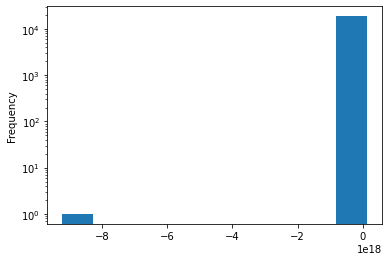

In [53]:
eqGoodData["gaps"].plot(kind="hist", logy=True);

#c'è un problema su questi dati: hanno una distribuzione molto skewd

In [54]:
eqGoodData.describe()

,mag,gaps
count,18852.000000,1.885200e+04
mean,2.399488,-4.574501e+14
std,0.392436,6.718482e+16
min,2.000000,-9.223372e+18
25%,2.110000,2.736622e+12
50%,2.290000,8.946950e+12
75%,2.570000,2.133966e+13
max,5.800000,1.199632e+17


In [55]:
eqGoodData

,datetime,mag,gaps
0,1984-01-01 01:30:57.520,2.02,-9.223372e+18
1,1984-01-01 05:31:34.160,2.12,1.443664e+13
2,1984-01-01 06:59:05.140,2.43,5.250980e+12
3,1984-01-01 11:10:25.290,2.07,1.508015e+13
4,1984-01-01 19:38:19.790,2.13,3.047450e+13
...,...,...,...
70793,2002-12-29 19:37:24.560,2.21,3.014000e+10
70794,2002-12-29 20:17:33.400,2.02,2.408840e+12
70795,2002-12-29 20:21:28.730,2.07,2.353300e+11
70796,2002-12-30 21:51:52.550,2.31,9.182382e+13


In [56]:
#non ha senso considerare il primo terremoto, perché ha un time gaps negativo
eqGoodData=eqGoodData[1:]

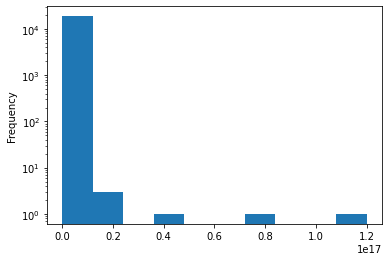

In [57]:
eqGoodData["gaps"].plot(kind="hist", logy=True);

In [59]:
#distribuzione ancora molto skewd. Posso buttare via per rendere il
#grafico più chiaro i terremoti con un time gaps superiore a un mese

#mese in nanosecondi
monthgap = 2.628e+15 
eqGoodData = eqGoodData[eqGoodData.gaps < monthgap]

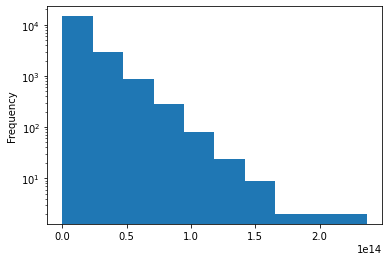

In [60]:
eqGoodData["gaps"].plot(kind="hist", logy=True);

In [65]:
#distribuzione più ragionevole (non era necessario eliminarli per il KS)
#inoltre non erano dei dati significativi, in quanto outliers non fisici 
#dovuti al fatto che ho troncato le date.

#ora possiamo creare i subsamples e fare i test statistici, tutto ciò che
#abbiamo fatto finora era solo un riaggiustamento/raffinamento/selezione
#dei miei dati

#fisso una threshold
alpha = 0.003 # 3 SIGMA

t1 = eqGoodData['gaps'][eqGoodData.mag >= 2]
t2 = eqGoodData['gaps'][eqGoodData.mag >= 2.5]

#faccio il KS Test sui due sample t1 e t2
#nel paper gli earthquakes coi timesteps si mettono in scala logaritmica
#usiamo la funzione di numpy np.log10()
sp.stats.ks_2samp(np.log10(t1),np.log10(t2))

KstestResult(statistic=0.027581930568767787, pvalue=0.0024725857409166265, statistic_location=12.4585124519953, statistic_sign=-1)

(array([4568., 5364., 5600., 5685., 5707., 5714., 5717., 5719., 5719.,
        5720.]),
 array([1.70000000e+08, 2.36584280e+13, 4.73166860e+13, 7.09749440e+13,
        9.46332020e+13, 1.18291460e+14, 1.41949718e+14, 1.65607976e+14,
        1.89266234e+14, 2.12924492e+14, 2.36582750e+14]),
 [<matplotlib.patches.Polygon at 0x7f60a5ea44f0>])

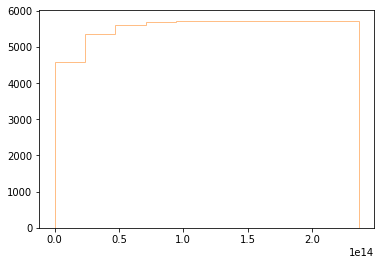

In [70]:
pl.hist(t1, cumulative=True, alpha=0.5, histtype="step", density=1)
pl.hist(t2, cumulative=True, alpha=0.5, histtype="step")

original data size: 18840
removing time gaps that are too long. new size: 18837
mean unrescaled time gap 19250664939215.375
removing time gaps too small, first pass: new size 17850
mean unrescaled time gap 1.055
removing time gaps too small, second pass: new size 17821
mean unrescaled time gap 1.002
  
original data size: 5719
removing time gaps that are too long. new size: 5716
mean unrescaled time gap 63383511726731.977
removing time gaps too small, first pass: new size 5339
mean unrescaled time gap 1.070
removing time gaps too small, second pass: new size 5319
mean unrescaled time gap 1.004
  
original data size: 1463
removing time gaps that are too long. new size: 1460
mean unrescaled time gap 247595145239726.031
removing time gaps too small, first pass: new size 1322
mean unrescaled time gap 1.104
removing time gaps too small, second pass: new size 1318
mean unrescaled time gap 1.003
  
original data size: 428
removing time gaps that are too long. new size: 425
mean unrescaled tim

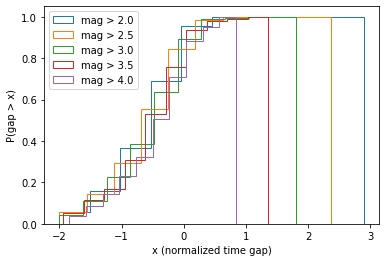

In [71]:
#delete

#funzione un po' più fighettina che mi riproduce le scaling law delle varie
#subsets 

def rescale(df, threshold=0.01):
    times = [] # container for all arrays of rescaled time gaps (for 5 magnitude thresholds)
    hss = [] # container for heights of histograms
    binss = [] # container for bins of histograms

    for m in [2, 2.5, 3, 3.5, 4]:
        #select magnitude and convert to floating point numbers
        tmp = df['datetime'][df.mag >= m].diff().values[1:].astype(float)
        print("original data size:", len(tmp))
    
        tmp = tmp[tmp < 3e16]
        print("removing time gaps that are too long. new size:", len(tmp))

        #iterate 3 times for stability 
         
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, first pass: new size", len(tmp))
   
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, second pass: new size", len(tmp))
 
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
    
        tmp = tmp / rs
        print("  ")
    
        times.append(np.log10(tmp))
    
        #calculate the histogram of the last array of times (the one that you just calculated)
        hs, bins, patch= pl.hist(times[-1], 
                             cumulative=True, density=1, histtype="step", label="mag > %.1f"%m)
        hss.append(hs)
        binss.append(bins)

    pl.legend(fontsize=10)
    pl.xlabel("x (normalized time gap)")
    pl.ylabel("P(gap > x)")
    return binss, hss, times
  
binss, hss, times = rescale(eqGoodData, threshold=0.01)

In [77]:
#faccio il KS test sui miei 5 samples

mags=[2, 2.5, 3, 3.5, 4]

for i in range(5):
  for j in range(i+1, 5):
    tmp = sp.stats.ks_2samp(times[i], times[j])
    print(mags[i],mags[j], "{:.3f}".format(tmp[1]))

# il KS test è molto sensibile alla media, quindi se la media non è correttamente
# normalizzata, può succedere che ottengo delle probabilità strane. Ci sono
# altri test che sono invece più sensibili alle code delle distribuzioni,
# ad esempio il test di Anderson. 

# abbiamo così riprodotto in full ciò che dice il paper

2 2.5 0.118
2 3 0.583
2 3.5 0.868
2 4 0.409
2.5 3 0.298
2.5 3.5 0.651
2.5 4 0.244
3 3.5 0.586
3 4 0.578
3.5 4 0.481
